<a href="https://colab.research.google.com/github/dahlia52/Commercial-District-Analysis/blob/main/code/%EB%B6%84%EA%B8%B0%EB%B3%84_%EC%9E%84%EB%8C%80%EC%8B%9C%EC%84%B8_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#matplotlib 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (19.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122518 files and dir

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import seaborn as sns
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 임대시세 데이터 정리

In [ ]:
rent = pd.read_csv('/content/drive/MyDrive/광진구팟/Data/임대료/분기별 임대시세.CSV', encoding = 'cp949')

In [ ]:
rent.shape

(18, 37)

In [ ]:
rent = rent.drop([0],axis=0, inplace=False) # 환산임대료 행 drop

In [ ]:
rent = rent.reset_index(drop=True)

In [ ]:
rent.head()

,행정구역,2020년 1분기,Unnamed: 2,Unnamed: 3,2020년 2분기,Unnamed: 5,Unnamed: 6,2020년 3분기,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,2022년 2분기,Unnamed: 29,Unnamed: 30,2022년 3분기,Unnamed: 32,Unnamed: 33,2022년 4분기,Unnamed: 35,Unnamed: 36
0,NaN,전체,1층,1층 외,전체,1층,1층 외,전체,1층,1층 외,...,1층 외,전체,1층,1층 외,전체,1층,1층 외,전체,1층,1층 외
1,광진구,"98,741","121,978","75,504","96,574","118,571","74,577","95,941","118,023","73,859",...,"82,793","112,800","134,024","91,576","113,264","133,926","92,602","112,871","131,081","94,660"
2,화양동,"125,955","165,353","86,557","122,036","157,380","86,692","124,964","159,042","90,886",...,"116,864","163,200","205,529","120,870","154,594","194,798","114,389","148,440","187,644","109,236"
3,군자동,"87,502","110,347","64,657","81,073","110,375","51,771","81,062","113,305","48,820",...,"79,056","110,838","115,133","106,543","115,789","113,547","118,031","121,174","117,810","124,538"
4,중곡1동,"76,883","91,230","62,535","72,117","86,663","57,571","75,098","91,653","58,542",...,"67,718","102,622","148,120","57,124","89,225","129,837","48,613","89,540","124,660","54,421"


In [ ]:
for i in range(rent.shape[1]-1, 0, -1):
  rent.rename(columns = {rent.columns[i]:rent.columns[((i-1)//3)*3 + 1] + " " + rent.iloc[0,i]}, inplace = True)

In [ ]:
rent.drop([0], inplace = True)

In [ ]:
rent.head()

,행정구역,2020년 1분기 전체,2020년 1분기 1층,2020년 1분기 1층 외,2020년 2분기 전체,2020년 2분기 1층,2020년 2분기 1층 외,2020년 3분기 전체,2020년 3분기 1층,2020년 3분기 1층 외,...,2022년 1분기 1층 외,2022년 2분기 전체,2022년 2분기 1층,2022년 2분기 1층 외,2022년 3분기 전체,2022년 3분기 1층,2022년 3분기 1층 외,2022년 4분기 전체,2022년 4분기 1층,2022년 4분기 1층 외
1,광진구,"98,741","121,978","75,504","96,574","118,571","74,577","95,941","118,023","73,859",...,"82,793","112,800","134,024","91,576","113,264","133,926","92,602","112,871","131,081","94,660"
2,화양동,"125,955","165,353","86,557","122,036","157,380","86,692","124,964","159,042","90,886",...,"116,864","163,200","205,529","120,870","154,594","194,798","114,389","148,440","187,644","109,236"
3,군자동,"87,502","110,347","64,657","81,073","110,375","51,771","81,062","113,305","48,820",...,"79,056","110,838","115,133","106,543","115,789","113,547","118,031","121,174","117,810","124,538"
4,중곡1동,"76,883","91,230","62,535","72,117","86,663","57,571","75,098","91,653","58,542",...,"67,718","102,622","148,120","57,124","89,225","129,837","48,613","89,540","124,660","54,421"
5,중곡2동,"71,289","87,958","54,619","70,469","90,423","50,515","70,243","90,281","50,205",...,"62,697","91,703","113,266","70,140","99,001","114,907","83,095","92,658","104,358","80,959"


In [ ]:
# 광진구 법정동 생성

def get_법정동(x):
  if "광장동" in x:
    return "광장동"
  elif "구의" in x:
    return "구의동"
  elif "군자동" in x:
    return "군자동"
  elif "능동" in x:
    return "능동"
  elif "자양" in x:
    return "자양동"
  elif "중곡" in x:
    return "중곡동"
  elif "화양" in x:
    return "화양동"

In [ ]:
rent['법정동명'] = rent['행정구역'].map(lambda x: get_법정동(x))
rent.iloc[0,37] = '광진구'

In [ ]:
for i in rent.columns[1:-1]:
  rent[i] = rent[i].map(lambda x: x.replace(",","")).astype(int)

In [ ]:
rent.head()

,행정구역,2020년 1분기 전체,2020년 1분기 1층,2020년 1분기 1층 외,2020년 2분기 전체,2020년 2분기 1층,2020년 2분기 1층 외,2020년 3분기 전체,2020년 3분기 1층,2020년 3분기 1층 외,...,2022년 2분기 전체,2022년 2분기 1층,2022년 2분기 1층 외,2022년 3분기 전체,2022년 3분기 1층,2022년 3분기 1층 외,2022년 4분기 전체,2022년 4분기 1층,2022년 4분기 1층 외,법정동명
1,광진구,98741,121978,75504,96574,118571,74577,95941,118023,73859,...,112800,134024,91576,113264,133926,92602,112871,131081,94660,광진구
2,화양동,125955,165353,86557,122036,157380,86692,124964,159042,90886,...,163200,205529,120870,154594,194798,114389,148440,187644,109236,화양동
3,군자동,87502,110347,64657,81073,110375,51771,81062,113305,48820,...,110838,115133,106543,115789,113547,118031,121174,117810,124538,군자동
4,중곡1동,76883,91230,62535,72117,86663,57571,75098,91653,58542,...,102622,148120,57124,89225,129837,48613,89540,124660,54421,중곡동
5,중곡2동,71289,87958,54619,70469,90423,50515,70243,90281,50205,...,91703,113266,70140,99001,114907,83095,92658,104358,80959,중곡동


In [ ]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 1 to 16
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   행정구역            16 non-null     object
 1   2020년 1분기 전체    16 non-null     int64 
 2   2020년 1분기 1층    16 non-null     int64 
 3   2020년 1분기 1층 외  16 non-null     int64 
 4   2020년 2분기 전체    16 non-null     int64 
 5   2020년 2분기 1층    16 non-null     int64 
 6   2020년 2분기 1층 외  16 non-null     int64 
 7   2020년 3분기 전체    16 non-null     int64 
 8   2020년 3분기 1층    16 non-null     int64 
 9   2020년 3분기 1층 외  16 non-null     int64 
 10  2020년 4분기 전체    16 non-null     int64 
 11  2020년 4분기 1층    16 non-null     int64 
 12  2020년 4분기 1층 외  16 non-null     int64 
 13  2021년 1분기 전체    16 non-null     int64 
 14  2021년 1분기 1층    16 non-null     int64 
 15  2021년 1분기 1층 외  16 non-null     int64 
 16  2021년 2분기 전체    16 non-null     int64 
 17  2021년 2분기 1층    16 non-null     int64 
 18  2021년 2분기 1층

In [ ]:
rent.isnull().sum()

행정구역              0
2020년 1분기 전체      0
2020년 1분기 1층      0
2020년 1분기 1층 외    0
2020년 2분기 전체      0
2020년 2분기 1층      0
2020년 2분기 1층 외    0
2020년 3분기 전체      0
2020년 3분기 1층      0
2020년 3분기 1층 외    0
2020년 4분기 전체      0
2020년 4분기 1층      0
2020년 4분기 1층 외    0
2021년 1분기 전체      0
2021년 1분기 1층      0
2021년 1분기 1층 외    0
2021년 2분기 전체      0
2021년 2분기 1층      0
2021년 2분기 1층 외    0
2021년 3분기 전체      0
2021년 3분기 1층      0
2021년 3분기 1층 외    0
2021년 4분기 전체      0
2021년 4분기 1층      0
2021년 4분기 1층 외    0
2022년 1분기 전체      0
2022년 1분기 1층      0
2022년 1분기 1층 외    0
2022년 2분기 전체      0
2022년 2분기 1층      0
2022년 2분기 1층 외    0
2022년 3분기 전체      0
2022년 3분기 1층      0
2022년 3분기 1층 외    0
2022년 4분기 전체      0
2022년 4분기 1층      0
2022년 4분기 1층 외    0
법정동명              0
dtype: int64

In [ ]:
rent.to_csv('/content/drive/MyDrive/광진구팟/Data/임대료/rent.csv', index = False)

## EDA

In [ ]:
rent = pd.read_csv('/content/drive/MyDrive/광진구팟/Data/임대료/rent.csv')

In [ ]:
rent.head()

,행정구역,2020년 1분기 전체,2020년 1분기 1층,2020년 1분기 1층 외,2020년 2분기 전체,2020년 2분기 1층,2020년 2분기 1층 외,2020년 3분기 전체,2020년 3분기 1층,2020년 3분기 1층 외,...,2022년 2분기 전체,2022년 2분기 1층,2022년 2분기 1층 외,2022년 3분기 전체,2022년 3분기 1층,2022년 3분기 1층 외,2022년 4분기 전체,2022년 4분기 1층,2022년 4분기 1층 외,법정동명
0,광진구,98741,121978,75504,96574,118571,74577,95941,118023,73859,...,112800,134024,91576,113264,133926,92602,112871,131081,94660,광진구
1,화양동,125955,165353,86557,122036,157380,86692,124964,159042,90886,...,163200,205529,120870,154594,194798,114389,148440,187644,109236,화양동
2,군자동,87502,110347,64657,81073,110375,51771,81062,113305,48820,...,110838,115133,106543,115789,113547,118031,121174,117810,124538,군자동
3,중곡1동,76883,91230,62535,72117,86663,57571,75098,91653,58542,...,102622,148120,57124,89225,129837,48613,89540,124660,54421,중곡동
4,중곡2동,71289,87958,54619,70469,90423,50515,70243,90281,50205,...,91703,113266,70140,99001,114907,83095,92658,104358,80959,중곡동


### 1층과 1층외 임대료 평균 비교

In [ ]:
# 1층과 1층 외 임대료 평균 비교
floor1 = 0; floor_else = 0
for i in range(12):
  floor1 += rent.iloc[0,(3*i+2)]
  floor_else += rent.iloc[0,(3*i+3)]
floor1 /= 12
floor_else /= 12

floor1 = int(floor1)
floor_else = int(floor_else)

print(floor1)
print(floor_else)

126457
79470


In [ ]:
floor = pd.DataFrame([['1층',floor1], ['1층 외', floor_else]], columns = ['층수','분기별_임대료_평균'])

In [ ]:
floor

,층수,분기별_임대료_평균
0,1층,126457
1,1층 외,79470


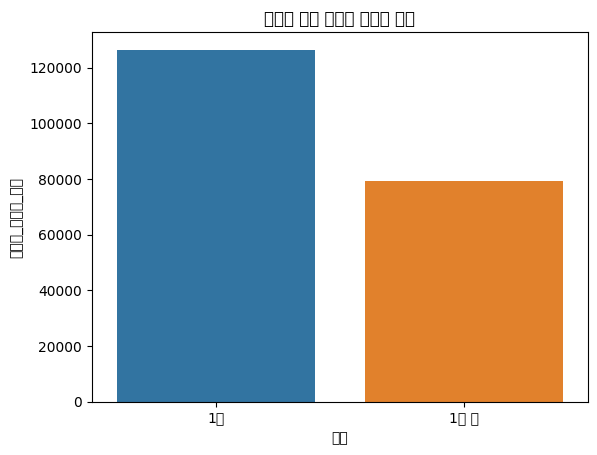

In [ ]:
sns.barplot(x='층수', y='분기별_임대료_평균', data=floor)
plt.title('층수에 따른 분기별 임대료 평균') # 1층이 1층이 아닌 곳보다 약 1.6배 더 임대료가 높음.
plt.show()

### 분기별 광진구 임대료 평균 변화

In [ ]:
# 분기 별 광진구 임대료 평균 변화
index = range(1,37,3)
pd.DataFrame(rent.iloc[0,index])
# 20년도에는 코로나 발생으로 임대료가 감소했다가 최근 다시 증가하는 경향을 보임.

,0
2020년 1분기 전체,98741
2020년 2분기 전체,96574
2020년 3분기 전체,95941
2020년 4분기 전체,94783
2021년 1분기 전체,95417
2021년 2분기 전체,96656
2021년 3분기 전체,101067
2021년 4분기 전체,107323
2022년 1분기 전체,110132
2022년 2분기 전체,112800


### 행정동별 최근 임대료 비교

In [ ]:
# 2022년 4분기 동 별 임대료 비교
rent.iloc[1::,[0,-4]]

,행정구역,2022년 4분기 전체
1,화양동,148440
2,군자동,121174
3,중곡1동,89540
4,중곡2동,92658
5,중곡3동,85483
6,중곡4동,95855
7,능동,116337
8,광장동,147295
9,자양1동,95751
10,자양2동,109256


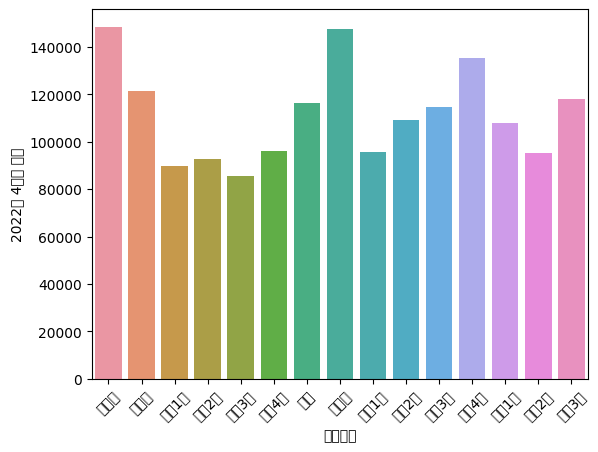

In [ ]:
sns.barplot(x='행정구역', y='2022년 4분기 전체', data = rent.iloc[1::,[0,-4]])
plt.xticks(rotation=45)
plt.show()

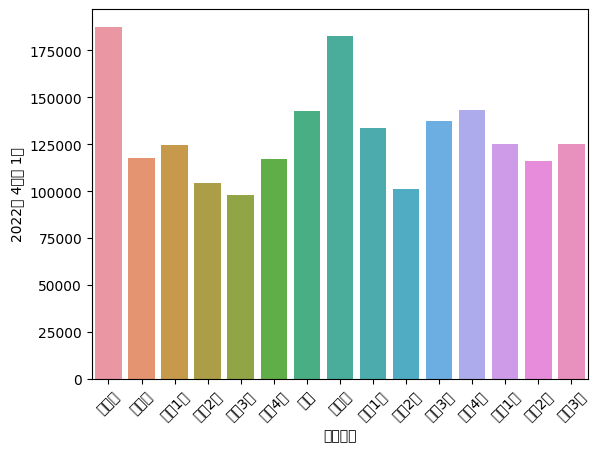

In [ ]:
sns.barplot(x='행정구역', y='2022년 4분기 1층', data = rent.iloc[1::,[0,-3]])
plt.xticks(rotation=45)
plt.show()

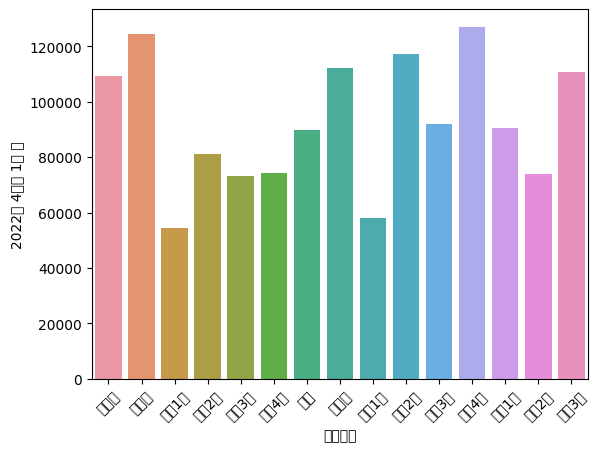

In [ ]:
sns.barplot(x='행정구역', y='2022년 4분기 1층 외', data = rent.iloc[1::,[0,-2]])
plt.xticks(rotation=45)
plt.show()

### 임대료 증가율 분석

In [ ]:
rent.head()

,행정구역,2020년 1분기 전체,2020년 1분기 1층,2020년 1분기 1층 외,2020년 2분기 전체,2020년 2분기 1층,2020년 2분기 1층 외,2020년 3분기 전체,2020년 3분기 1층,2020년 3분기 1층 외,...,2022년 2분기 전체,2022년 2분기 1층,2022년 2분기 1층 외,2022년 3분기 전체,2022년 3분기 1층,2022년 3분기 1층 외,2022년 4분기 전체,2022년 4분기 1층,2022년 4분기 1층 외,법정동명
0,광진구,98741,121978,75504,96574,118571,74577,95941,118023,73859,...,112800,134024,91576,113264,133926,92602,112871,131081,94660,광진구
1,화양동,125955,165353,86557,122036,157380,86692,124964,159042,90886,...,163200,205529,120870,154594,194798,114389,148440,187644,109236,화양동
2,군자동,87502,110347,64657,81073,110375,51771,81062,113305,48820,...,110838,115133,106543,115789,113547,118031,121174,117810,124538,군자동
3,중곡1동,76883,91230,62535,72117,86663,57571,75098,91653,58542,...,102622,148120,57124,89225,129837,48613,89540,124660,54421,중곡동
4,중곡2동,71289,87958,54619,70469,90423,50515,70243,90281,50205,...,91703,113266,70140,99001,114907,83095,92658,104358,80959,중곡동


In [ ]:
# 상권별 임대료 증가율 (전체)

rent_increase = rent[['행정구역']]

for i in range(4,37,3):
  rent_increase[rent.columns[i]+" 증가율"] = round((rent.iloc[:,i]/rent.iloc[:,i-3])*100,2)

In [ ]:
rent_increase

,행정구역,2020년 2분기 전체 증가율,2020년 3분기 전체 증가율,2020년 4분기 전체 증가율,2021년 1분기 전체 증가율,2021년 2분기 전체 증가율,2021년 3분기 전체 증가율,2021년 4분기 전체 증가율,2022년 1분기 전체 증가율,2022년 2분기 전체 증가율,2022년 3분기 전체 증가율,2022년 4분기 전체 증가율
0,광진구,97.81,99.34,98.79,100.67,101.30,104.56,106.19,102.62,102.42,100.41,99.65
1,화양동,96.89,102.40,130.60,94.73,96.02,91.28,104.95,108.58,105.69,94.73,96.02
2,군자동,92.65,99.99,136.73,104.47,104.65,79.28,105.66,95.20,114.70,104.47,104.65
3,중곡1동,93.80,104.13,136.65,86.95,100.35,93.31,114.81,104.79,102.09,86.95,100.35
4,중곡2동,98.85,99.68,130.55,107.96,93.59,83.57,108.65,109.25,99.77,107.96,93.59
5,중곡3동,96.43,99.48,116.89,104.09,107.73,102.84,105.34,90.64,90.82,104.09,107.73
6,중곡4동,96.45,95.89,139.14,99.68,91.77,94.79,99.48,109.13,106.22,99.68,91.77
7,능동,101.06,101.53,130.04,92.38,93.44,92.19,110.50,106.31,106.97,92.38,93.44
8,광장동,99.61,102.29,112.99,113.58,102.61,74.88,108.15,93.59,113.21,113.58,102.61
9,자양1동,95.41,98.19,108.69,93.63,96.78,110.69,107.31,97.27,95.52,93.63,96.78


In [ ]:
rent_increase_melt = pd.melt(rent_increase, id_vars=['행정구역'], var_name='연도/분기', value_name='percentage(%)')
rent_increase_melt['연도/분기'] = rent_increase_melt['연도/분기'].map(lambda x: x[:10])

In [ ]:
rent_increase_melt

,행정구역,연도/분기,percentage(%)
0,광진구,2020년 2분기,97.81
1,화양동,2020년 2분기,96.89
2,군자동,2020년 2분기,92.65
3,중곡1동,2020년 2분기,93.80
4,중곡2동,2020년 2분기,98.85
...,...,...,...
171,자양3동,2022년 4분기,97.17
172,자양4동,2022년 4분기,101.56
173,구의1동,2022년 4분기,100.60
174,구의2동,2022년 4분기,103.31


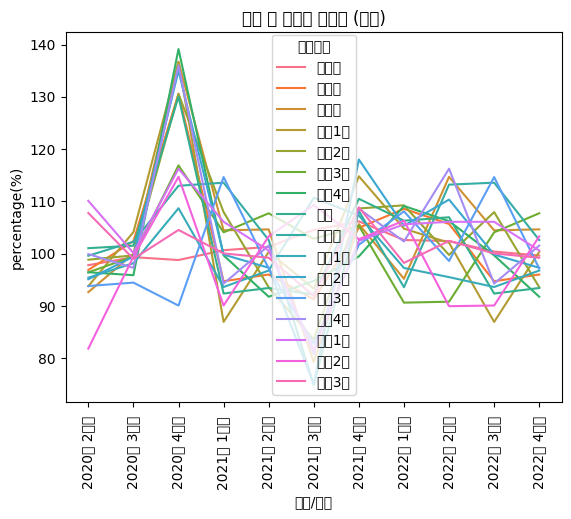

In [ ]:
sns.lineplot(x='연도/분기', y='percentage(%)', hue='행정구역', data = rent_increase_melt)
plt.xticks(rotation=90)
plt.title('상권 별 임대료 증가율 (전체)')
plt.show()

In [ ]:
# 상권별 임대료 증가율 (1층)

rent_increase_1층 = rent[['행정구역']]

for i in range(5,37,3):
  rent_increase_1층[rent.columns[i]+" 증가율"] = round((rent.iloc[:,i]/rent.iloc[:,i-3])*100,2)

In [ ]:
rent_increase_1층

,행정구역,2020년 2분기 1층 증가율,2020년 3분기 1층 증가율,2020년 4분기 1층 증가율,2021년 1분기 1층 증가율,2021년 2분기 1층 증가율,2021년 3분기 1층 증가율,2021년 4분기 1층 증가율,2022년 1분기 1층 증가율,2022년 2분기 1층 증가율,2022년 3분기 1층 증가율,2022년 4분기 1층 증가율
0,광진구,97.21,99.54,99.67,101.94,102.00,105.02,104.40,102.51,97.49,99.93,97.88
1,화양동,95.18,101.06,129.23,94.78,96.33,92.56,102.99,107.31,107.07,94.78,96.33
2,군자동,100.03,102.65,101.61,98.62,103.75,96.08,104.70,96.37,100.82,98.62,103.75
3,중곡1동,94.99,105.76,161.61,87.66,96.01,89.35,113.17,105.77,111.10,87.66,96.01
4,중곡2동,102.80,99.84,125.46,101.45,90.82,97.40,108.91,109.42,93.51,101.45,90.82
5,중곡3동,95.01,98.47,106.29,94.67,104.87,125.07,110.77,91.45,79.50,94.67,104.87
6,중곡4동,94.99,97.50,111.21,106.72,93.21,100.68,101.85,108.36,90.48,106.72,93.21
7,능동,98.48,102.91,118.29,96.52,89.97,105.11,105.71,107.89,96.05,96.52,89.97
8,광장동,96.20,102.13,104.80,120.31,101.25,75.78,102.95,90.50,116.27,120.31,101.25
9,자양1동,103.89,97.36,116.73,96.58,99.82,102.60,104.93,102.58,93.93,96.58,99.82


In [ ]:
rent_increase_1층_melt = pd.melt(rent_increase_1층, id_vars=['행정구역'], var_name='연도/분기', value_name='percentage(%)')
rent_increase_1층_melt['연도/분기'] = rent_increase_1층_melt['연도/분기'].map(lambda x: x[:10])

In [ ]:
rent_increase_1층_melt

,행정구역,연도/분기,percentage(%)
0,광진구,2020년 2분기,97.21
1,화양동,2020년 2분기,95.18
2,군자동,2020년 2분기,100.03
3,중곡1동,2020년 2분기,94.99
4,중곡2동,2020년 2분기,102.80
...,...,...,...
171,자양3동,2022년 4분기,99.72
172,자양4동,2022년 4분기,95.17
173,구의1동,2022년 4분기,96.87
174,구의2동,2022년 4분기,102.24


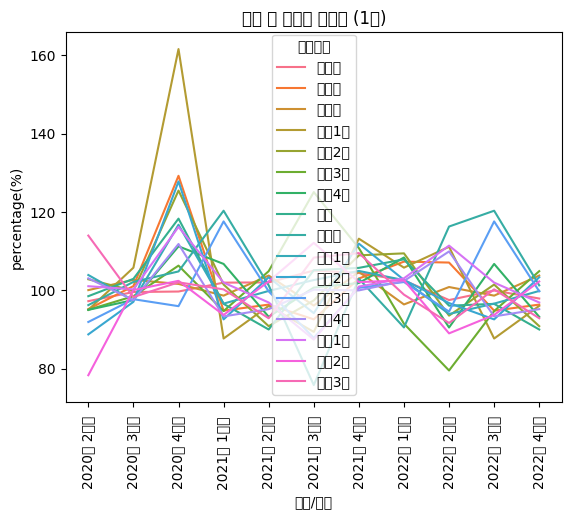

In [ ]:
sns.lineplot(x='연도/분기', y='percentage(%)', hue='행정구역', data = rent_increase_1층_melt)
plt.xticks(rotation=90)
plt.title('상권 별 임대료 증가율 (1층)')
plt.show()

In [ ]:
# 상권별 임대료 증가율 (1층 외)

rent_increase_1층외 = rent[['행정구역']]

for i in range(6,37,3):
  rent_increase_1층외[rent.columns[i]+" 증가율"] = round((rent.iloc[:,i]/rent.iloc[:,i-3])*100,2)

In [ ]:
rent_increase_1층외

,행정구역,2020년 2분기 1층 외 증가율,2020년 3분기 1층 외 증가율,2020년 4분기 1층 외 증가율,2021년 1분기 1층 외 증가율,2021년 2분기 1층 외 증가율,2021년 3분기 1층 외 증가율,2021년 4분기 1층 외 증가율,2022년 1분기 1층 외 증가율,2022년 2분기 1층 외 증가율,2022년 3분기 1층 외 증가율,2022년 4분기 1층 외 증가율
0,광진구,98.77,99.04,97.39,98.60,100.11,103.77,109.31,102.80,110.61,101.12,102.22
1,화양동,100.16,104.84,132.99,94.64,95.50,89.09,108.44,110.73,103.43,94.64,95.50
2,군자동,80.07,94.30,218.24,110.78,105.51,63.39,107.04,93.56,134.77,110.78,105.51
3,중곡1동,92.06,101.69,97.58,85.10,111.95,102.38,118.08,102.93,84.36,85.10,111.95
4,중곡2동,92.49,99.39,139.71,118.47,97.43,65.75,108.14,108.92,111.87,118.47,97.43
5,중곡3동,100.24,102.05,142.87,121.28,111.80,73.15,92.92,88.44,122.69,121.28,111.80
6,중곡4동,99.90,92.28,205.51,90.63,89.61,85.52,95.10,110.66,136.82,90.63,89.61
7,능동,106.51,98.82,153.92,85.90,99.52,71.71,121.64,103.12,130.06,85.90,99.52
8,광장동,106.32,102.58,127.51,103.79,104.91,73.41,116.89,98.17,109.02,103.79,104.91
9,자양1동,84.38,99.51,96.09,88.02,90.43,129.36,111.65,88.13,98.69,88.02,90.43


In [ ]:
rent_increase_1층외_melt = pd.melt(rent_increase_1층외, id_vars=['행정구역'], var_name='연도/분기', value_name='percentage(%)')
rent_increase_1층외_melt['연도/분기'] = rent_increase_1층외_melt['연도/분기'].map(lambda x: x[:10])

In [ ]:
rent_increase_1층외_melt

,행정구역,연도/분기,percentage(%)
0,광진구,2020년 2분기,98.77
1,화양동,2020년 2분기,100.16
2,군자동,2020년 2분기,80.07
3,중곡1동,2020년 2분기,92.06
4,중곡2동,2020년 2분기,92.49
...,...,...,...
171,자양3동,2022년 4분기,93.59
172,자양4동,2022년 4분기,109.89
173,구의1동,2022년 4분기,106.26
174,구의2동,2022년 4분기,105.05


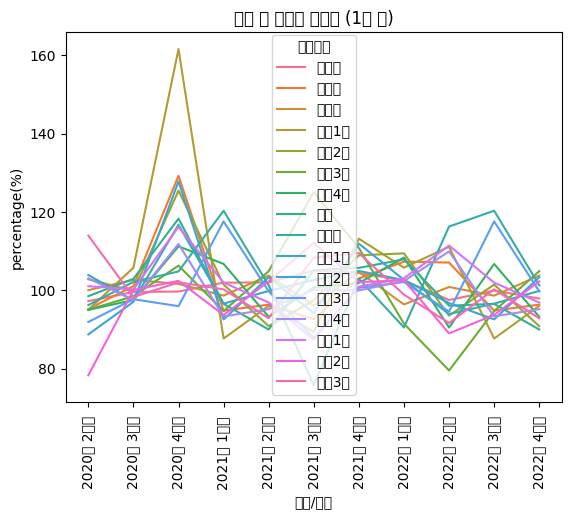

In [ ]:
sns.lineplot(x='연도/분기', y='percentage(%)', hue='행정구역', data = rent_increase_1층_melt)
plt.xticks(rotation=90)
plt.title('상권 별 임대료 증가율 (1층 외)')
plt.show()

In [ ]:
rent_increase_1층외_melt

,행정구역,연도/분기,percentage(%)
0,광진구,2020년 2분기,98.77
1,화양동,2020년 2분기,100.16
2,군자동,2020년 2분기,80.07
3,중곡1동,2020년 2분기,92.06
4,중곡2동,2020년 2분기,92.49
...,...,...,...
171,자양3동,2022년 4분기,93.59
172,자양4동,2022년 4분기,109.89
173,구의1동,2022년 4분기,106.26
174,구의2동,2022년 4분기,105.05


In [ ]:
rent_increase_melt.rename(columns = {'percentage(%)':'전체'}, inplace = True)
rent_increase_1층_melt.rename(columns = {'percentage(%)':'1층'}, inplace = True)
rent_increase_1층외_melt.rename(columns = {'percentage(%)':'1층외'}, inplace = True)

In [ ]:
rent_increase_정리 = pd.concat([rent_increase_melt, rent_increase_1층_melt['1층'], rent_increase_1층외_melt['1층외']], axis = 1)
rent_increase_정리

,행정구역,연도/분기,전체,1층,1층외
0,광진구,2020년 2분기,97.81,97.21,98.77
1,화양동,2020년 2분기,96.89,95.18,100.16
2,군자동,2020년 2분기,92.65,100.03,80.07
3,중곡1동,2020년 2분기,93.80,94.99,92.06
4,중곡2동,2020년 2분기,98.85,102.80,92.49
...,...,...,...,...,...
171,자양3동,2022년 4분기,97.17,99.72,93.59
172,자양4동,2022년 4분기,101.56,95.17,109.89
173,구의1동,2022년 4분기,100.60,96.87,106.26
174,구의2동,2022년 4분기,103.31,102.24,105.05


In [ ]:
# rent_increase_정리.to_csv('/content/drive/MyDrive/광진구팟/Data/임대료/임대료_증가율.csv', index = False)

### 행정동별 임대료 불안정성 평가

  - 광진구 전체 임대료 변동율 대비 행정동 임대료 변동율 평가

- 전체

In [ ]:
rent_불안정성 = rent[['행정구역']][1:].reset_index(drop = True)
rent_불안정성['불안정성'] = 0

In [ ]:
for i in range(1,16):
  rent_불안정성.iloc[i-1,1] = np.sqrt(((rent_increase.iloc[i,:].values[1:].astype(int)-rent_increase.iloc[0,:].values[1:].astype(int))**2).sum())

In [ ]:
rent_불안정성

,행정구역,불안정성
0,화양동,36.851052
1,군자동,48.518038
2,중곡1동,45.475268
3,중곡2동,41.545156
4,중곡3동,27.386128
5,중곡4동,45.585085
6,능동,38.262253
7,광장동,40.779897
8,자양1동,18.654758
9,자양2동,49.527770


- 1층

In [ ]:
rent_불안정성_1층 = rent[['행정구역']][1:].reset_index(drop = True)
rent_불안정성_1층['불안정성'] = 0

In [ ]:
for i in range(1,16):
  rent_불안정성_1층.iloc[i-1,1] = np.sqrt(((rent_increase_1층.iloc[i,:].values[1:].astype(int)-rent_increase_1층.iloc[0,:].values[1:].astype(int))**2).sum())

In [ ]:
rent_불안정성_1층

,행정구역,불안정성
0,화양동,36.290495
1,군자동,13.964240
2,중곡1동,69.339743
3,중곡2동,32.295511
4,중곡3동,32.588341
5,중곡4동,21.142375
6,능동,25.787594
7,광장동,47.571000
8,자양1동,20.024984
9,자양2동,34.741906


- 1층 외

In [ ]:
rent_불안정성_1층외 = rent[['행정구역']][1:].reset_index(drop = True)
rent_불안정성_1층외['불안정성'] = 0

In [ ]:
for i in range(1,16):
  rent_불안정성_1층외.iloc[i-1,1] = np.sqrt(((rent_increase_1층외.iloc[i,:].values[1:].astype(int)-rent_increase_1층외.iloc[0,:].values[1:].astype(int))**2).sum())

In [ ]:
rent_불안정성_1층외

,행정구역,불안정성
0,화양동,41.267421
1,군자동,132.325357
2,중곡1동,37.749172
3,중곡2동,63.285069
4,중곡3동,68.541958
5,중곡4동,115.969824
6,능동,72.145686
7,광장동,44.586994
8,자양1동,41.593269
9,자양2동,70.028566


In [ ]:
rent_불안정성.rename(columns = {'불안정성':'전체'}, inplace = True)
rent_불안정성_1층.rename(columns = {'불안정성':'1층'}, inplace = True)
rent_불안정성_1층외.rename(columns = {'불안정성':'1층외'}, inplace = True)

In [ ]:
rent_불안정성_정리 = pd.concat([rent_불안정성, rent_불안정성_1층['1층'], rent_불안정성_1층외['1층외']], axis = 1)
rent_불안정성_정리

,행정구역,전체,1층,1층외
0,화양동,36.851052,36.290495,41.267421
1,군자동,48.518038,13.964240,132.325357
2,중곡1동,45.475268,69.339743,37.749172
3,중곡2동,41.545156,32.295511,63.285069
4,중곡3동,27.386128,32.588341,68.541958
5,중곡4동,45.585085,21.142375,115.969824
6,능동,38.262253,25.787594,72.145686
7,광장동,40.779897,47.571000,44.586994
8,자양1동,18.654758,20.024984,41.593269
9,자양2동,49.527770,34.741906,70.028566


In [ ]:
rent_불안정성_정리.to_csv('/content/drive/MyDrive/광진구팟/Data/임대료/임대료_불안정성.csv', index = False)